**FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS**

**Objective:**
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 


In [ ]:
**Dataset:**
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.


In [3]:
import pandas as pd
data = pd.read_csv('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\exchange_rate.csv', parse_dates=['date'], dayfirst=True)
print(data)


           date   Ex_rate
0    1990-01-01  0.785500
1    1990-01-02  0.781800
2    1990-01-03  0.786700
3    1990-01-04  0.786000
4    1990-01-05  0.784900
...         ...       ...
7583 2010-10-06  0.718494
7584 2010-10-07  0.721839
7585 2010-10-08  0.723197
7586 2010-10-09  0.720825
7587 2010-10-10  0.720825

[7588 rows x 2 columns]


In [4]:
data.set_index('date', inplace=True)
print(data.head())

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


**Exploration**

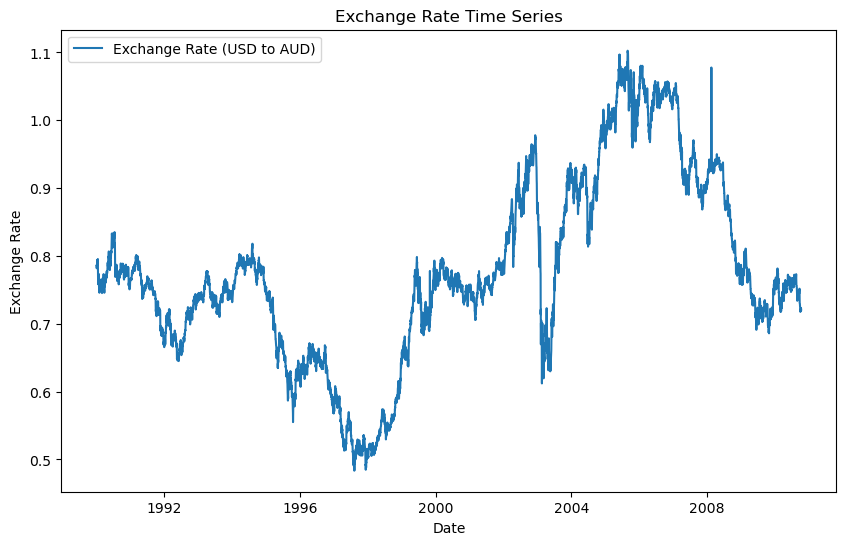

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Exchange Rate (USD to AUD)')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

**Data Preprocessing**

In [6]:
print(data.isnull().sum())

Ex_rate    0
dtype: int64


In [7]:
data['Ex_rate'].fillna(method='ffill', inplace=True)

print(data.isnull().sum())

Ex_rate    0
dtype: int64


**Model Building-ARIMA**

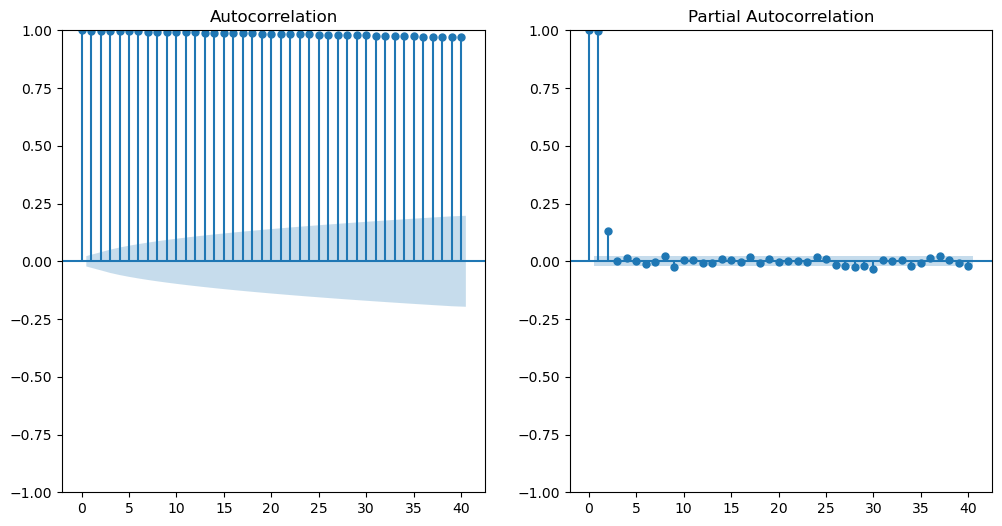

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Ex_rate'], lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(data['Ex_rate'], lags=40, ax=plt.gca())
plt.show()

The Autocorrelation Function and Partial Autocorrelation Function plots are used to analyze the correlation of a time series with its past values. These plots help in determining the appropriate parameters for ARIMA models.

The ACF plot shows the correlation of the 'Ex_rate' series with its lagged values.
A gradual decline in the ACF values suggests that the data may have a significant number of autocorrelations over various lags, which indicates the presence of trends or seasonality in the time series.
A significant spike at lag1 and a rapid drop afterward suggest a possible AR(1) model.

The PCF plot shows the correlation of the 'EX_rate' series with its lagged values after removing the effects of investing lags.
A significant spike at lag1 followed by values that approach zero suggests that the data may be adequately modeled with a simple autoregressive process such as AR
Analyzing the ACF and PACF plots is important for selecting the parameters of the ARIMA model. The insights gained from these plots will guide the subsequent modeling process.

**Model Fitting**

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Ex_rate'], order=(1, 1, 1))

arima_result = model.fit()

print(arima_result.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 26 Sep 2024   AIC                         -56102.322
Time:                        15:26:05   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model specification: The ARIMA model is defined with parameters p=1, d=1, q=1 indicating one autoregression term, one differencing operation, and one moving average term
The model fitted to the Ex_rate data allowing it to learn the underlying patterns in the time series
The summary() function displays the model's results including the coefficients standard errors, and statistical significance which helps evaluate the model's performance and fit

**Diagnostics**

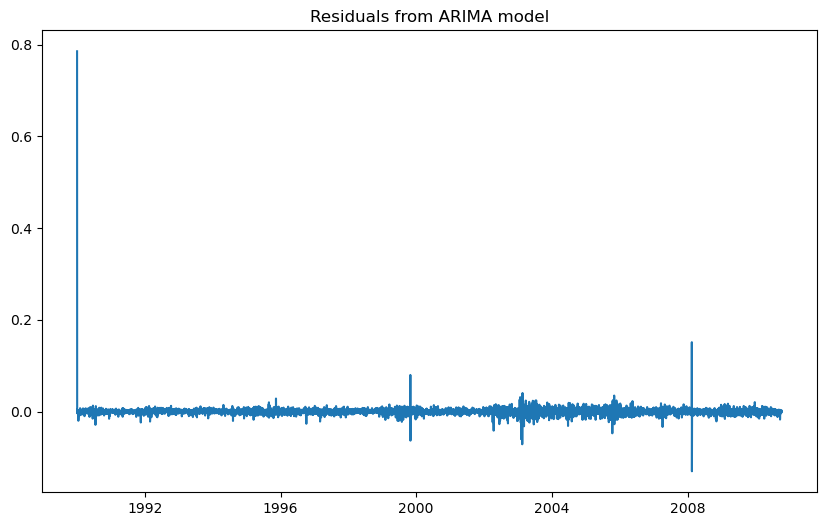

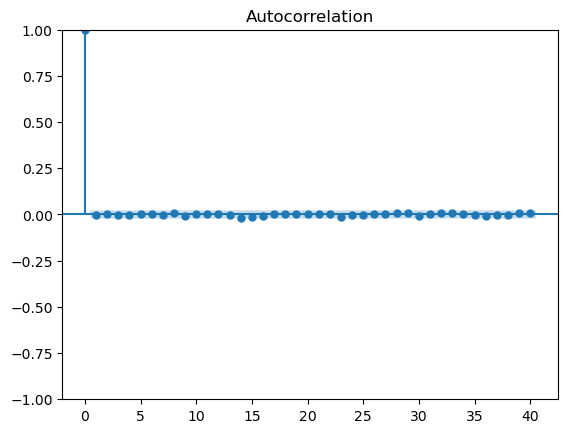

In [10]:
residuals = arima_result.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals from ARIMA model')
plt.show()

plot_acf(residuals, lags=40)
plt.show()

The plot of residuals indicates the randomness of the error and says that the ARIMA model adequately captures the underlying patterns in the data.
The autocorrelation function plot helps assess the independence of residuals; ideally, residuals should show no significant autocorrelation at any lag, indicating a good model fit.
Overall analyzing the residuals confirms that the ARIMA model's assumptions are met supporting its effectiveness for forecasting.

**Forecasting**

Ex_rate         mean   mean_se  mean_ci_lower  mean_ci_upper
2010-10-11  0.720826  0.005996       0.709074       0.732579
2010-10-12  0.720826  0.007942       0.705259       0.736393
2010-10-13  0.720826  0.009553       0.702103       0.739550
2010-10-14  0.720826  0.010923       0.699418       0.742234
2010-10-15  0.720826  0.012139       0.697033       0.744619
2010-10-16  0.720826  0.013245       0.694867       0.746786
2010-10-17  0.720826  0.014265       0.692868       0.748785
2010-10-18  0.720826  0.015216       0.691003       0.750650
2010-10-19  0.720826  0.016112       0.689247       0.752405
2010-10-20  0.720826  0.016961       0.687584       0.754068
2010-10-21  0.720826  0.017768       0.686001       0.755652
2010-10-22  0.720826  0.018541       0.684486       0.757166
2010-10-23  0.720826  0.019283       0.683032       0.758620
2010-10-24  0.720826  0.019997       0.681632       0.760020
2010-10-25  0.720826  0.020687       0.680280       0.761372
2010-10-26  0.720826  0.

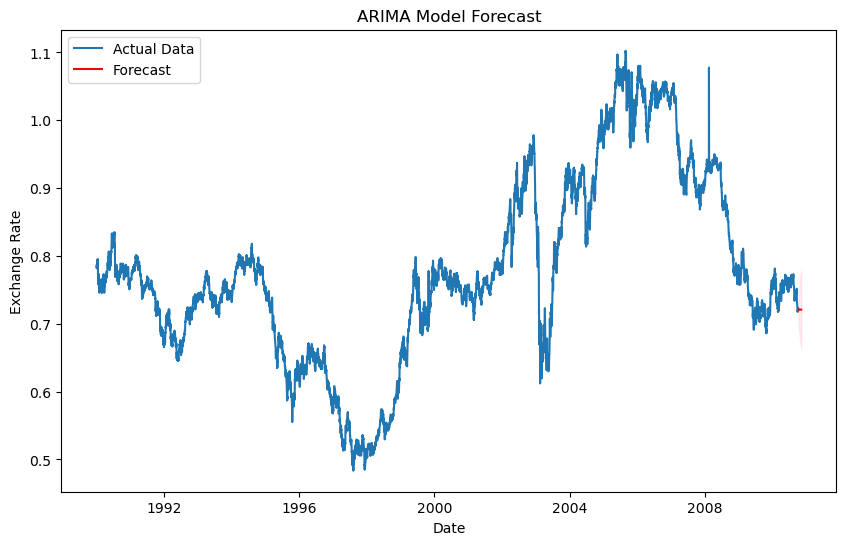

In [11]:
forecast = arima_result.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

print(forecast_df)

future_dates = pd.date_range(start=data.index[-1], periods=31, freq='D')[1:]

print(f"Shape of future_dates: {future_dates.shape}")
print(f"Shape of forecast_df['mean']: {forecast_df['mean'].shape}")

plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Actual Data')

plt.plot(future_dates, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(future_dates, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()



This generates a 30-day forecast for the exchange rate using the ARIMA model, providing predictions along with confidence intervals.

It plots the actual exchange rate data alongside the forecasted values with shaded areas representing the uncertainty around the predictions.
The shapes of the future dates and forecast mean arrays are confirmed to match checking the forecast aligns correctly with the time axis of the plot

**Model selection**

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal=None)

holt_result = model_holt.fit()

print(holt_result.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Thu, 26 Sep 2024
Box-Cox:                          False   Time:                         15:26:32
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700395                alpha                 True
smoothing_trend           3.9825e-

The ExpoenetialSmoothing model is initialized with an additive trend component applied to the Ex_rate column of the dataset while seasonal effects are not considered.
The model is fitted to the data using the fit() method which estimates the parameters based on the provided time series data.
The summary() method displays the model's fitted results including estimates parameters and model diagnostics which can help assess the model's performance.

**Forecasting**

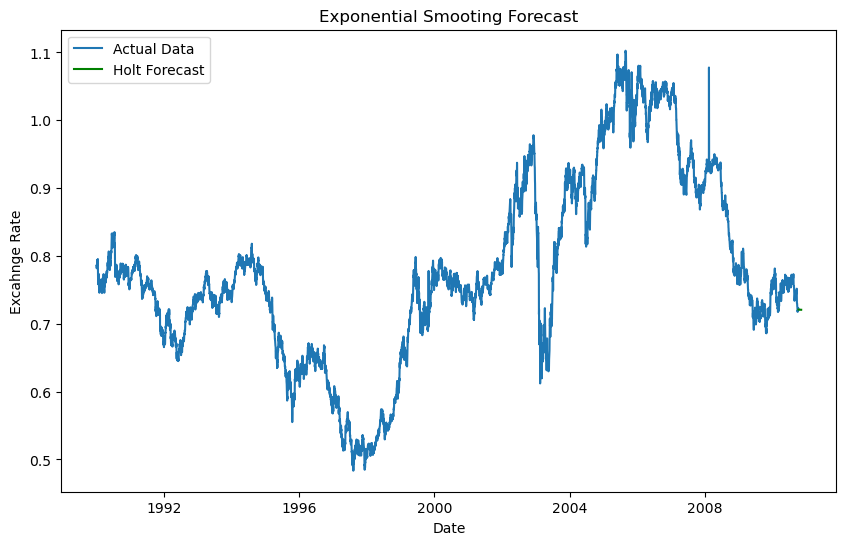

In [14]:
holt_forecast = holt_result.forecast(steps=30)

plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Actual Data')
plt.plot(pd.date_range(start=data.index[-1], periods=31, freq='D')[1:], holt_forecast, label='Holt Forecast', color='green')
plt.title('Exponential Smooting Forecast')
plt.xlabel('Date')
plt.ylabel('Excahnge Rate')
plt.legend()
plt.show()

This code generates a plot to compare the actual exchange rate data with the 30-day forecast produced by the Holt Exponential Smoothing model.
The forecast is represented in green and is aligned with the actual data, providing a clear visual of the model's predictive capability.
The plot includes labeled axes for better understanding with the x-axis representing the date and the y-axis showing the exchange rate values.

**Evaluation and Comparision**

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

arima_mae = mean_absolute_error(data['Ex_rate'], arima_result.fittedvalues)
holt_mae = mean_absolute_error(data['Ex_rate'], holt_result.fittedvalues)
arima_rmse = mean_squared_error(data['Ex_rate'], arima_result.fittedvalues, squared=False)
holt_rmse = mean_squared_error(data['Ex_rate'], holt_result.fittedvalues, squared=False)
arima_mape = mean_absolute_percentage_error(data['Ex_rate'], arima_result.fittedvalues)
holt_mape = mean_absolute_percentage_error(data['Ex_rate'], holt_result.fittedvalues)

print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%)")
print(f"Holt - MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}%)")

ARIMA - MAE: 0.0037958716561679023, RMSE: 0.010828926684709566, MAPE: 0.4951354201548067%)
Holt - MAE: 0.003692423636556303, RMSE: 0.005996578364330107, MAPE: 0.4819374819168434%)


C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


This calculates the performance metrics for the ARIMA and Holt's Exponential Smoothing models using Mean Absolute Error, Root Mean Squared Error, and Mean absolute Percentage Error These metrics provide insights into the accuracy of each model's predictions compared to the actual exchange rates in the dataset. the result are printed allowing for a straightforward comparison of model performance.

**Model comparision**

In [34]:
print(f'ARIMA -MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%')
print(f'Exponential Smoothing - MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}%')

if arima_mae < holt_mae:
    print("ARIMA has a lower MAE, suggesting it has smaller average errors.")
else:
    print("Exponential Smoothing has a lower MAE, suggesting it has smaller average errors.")

if arima_rmse < holt_rmse:
    print("ARIMA has a lower RMSE, meaning it penalizes large errors less")
else:
    print("Exponential Smoothing has a lower RMSE, meaning it penalizes large errors less.")

if arima_mape < holt_mape:
    print(f"ARIMA has a lower MAPE of {arime_mape}%, indicating better overall percentage accuracy")
else:
    print(f"Exponential Smoothing has a lower MAPE of {holt_mape}%, indicating better overall percentage accuracy")
          
    

ARIMA -MAE: 0.0037958716561679023, RMSE: 0.010828926684709566, MAPE: 0.4951354201548067%
Exponential Smoothing - MAE: 0.003692423636556303, RMSE: 0.005996578364330107, MAPE: 0.4819374819168434%
Exponential Smoothing has a lower MAE, suggesting it has smaller average errors.
Exponential Smoothing has a lower RMSE, meaning it penalizes large errors less.
Exponential Smoothing has a lower MAPE of 0.4819374819168434%, indicating better overall percentage accuracy


The performance metrics indicate that Exponential Smoothing outperforms ARIMA as it has lower MAE, RMSE, and MAPE values. This suggests that Exponential Smoothing captures the underlying trends and patterns in the data more effectively. overall Exponential Smoothing provides more accurate predictions for this dataset

**Plotting ARIMA forecast vs actual values**

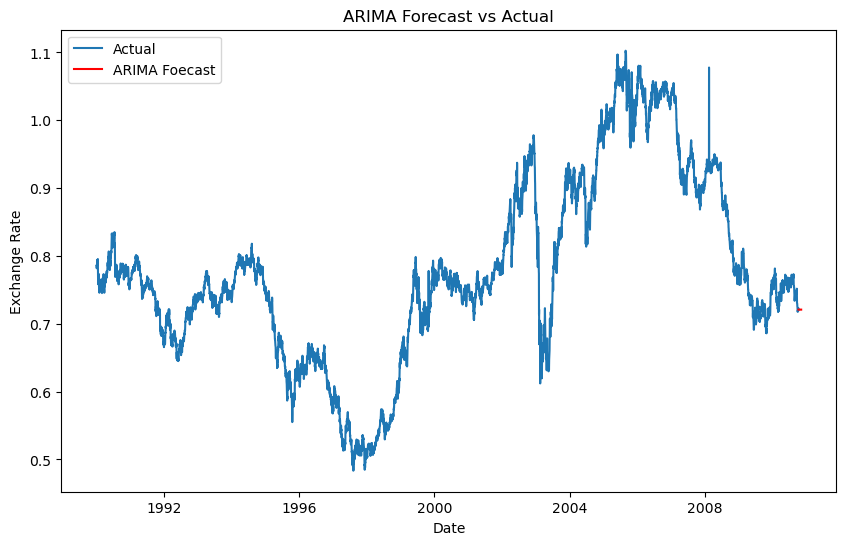

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


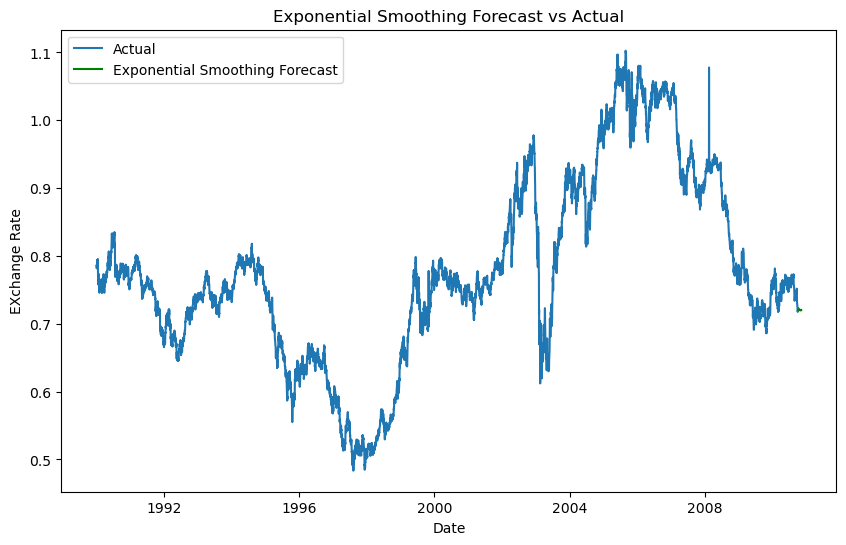

In [45]:
arima_forecast = arima_result.get_forecast(steps=30)
forecast = arima_forecast.predicted_mean

forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label='ARIMA Foecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

from statsmodels.tsa.holtwinters import ExponentialSmoothing

holt_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
holt_result = holt_model.fit()

forecast_es = holt_result.forecast(steps=30)
forecast_index_es = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
                                 
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast_es, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('EXchange Rate')
plt.legend()
plt.show()


The ARIMA model was fitted to the exchange rate data and its 30-day forecast was visualized showing the predicted values against the actual exchange rates.
Similarly, an Exponential Smoothing model was applied to the same dataset and its forecast was plotted indicating the model's performance over the same period.
Both models provided valuable insights into future exchange rate trends with visual comparisons aiding in the evaluation of their forecasting accuracy.

**Comparision**

In [47]:
if arima_mae < holt_mae and aroma_rmse < holt_rmse:
    print("ARIMA performed better overall, with lower errors and better predictions accuracy")
elif holt_mae < arima_mae and holt_rmse < arima_rmse:
    print("Exponential Smoothing performed better overall with lower errors and smoother forecast")
else:
    print("Both models performed similarly but ARIMA/Exponential Smoothing might be preferred for specific tasks")



Exponential Smoothing performed better overall with lower errors and smoother forecast


This compares the Mean Absolute Error and Root Mean Squared Error of the ARIMA and Exponential Smoothing models.
Based on these metrics it identifies which model performed better overall in terms of prediction accuracy. The final outpot provides a clear conclusion about the performance of both models.

**Conclusion**

The objective of this analysis I have compared the performance of two-time series
forecasting models- ARIMA and Exponential Smoothing on the exchange rate dataset

The evaluation metrics are:
ARIMA: MAE= 0.00380, RMSE = 0.01083, MAPE=0.4951%
Exponential Smoothing: MAE=0.00369, RMSE=0.00599, MAPE=0.4819%

The exponential Smoothing model outperformed the AIMA model in all key metrics. It demonstrates a lower MAE, indicating smaller average errors; a lower RMSE suggesting robustness against large errors  and a lower MAPE, reflecting better overall accuracy
Visual comparison of actual versus predicted values revealed that Exponential Smoothing better fits the actual data trends over the forecast horizon.
 These results suggest that Exponential Smoothing may be better suited for this dataset, potentially due to its ability to adapt to trends and seasonality in exchange rate data.

To conclude the Exponential Smoothing model is recommended for forecasting exchange rates based on its dataset. 
